<a href="https://colab.research.google.com/github/wisdom3D/data-analysis-project/blob/main/z_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[KOUDAMA HOSE WISDOM](https://www.linkedin.com/in/wisdom-koudama-369192229/
)

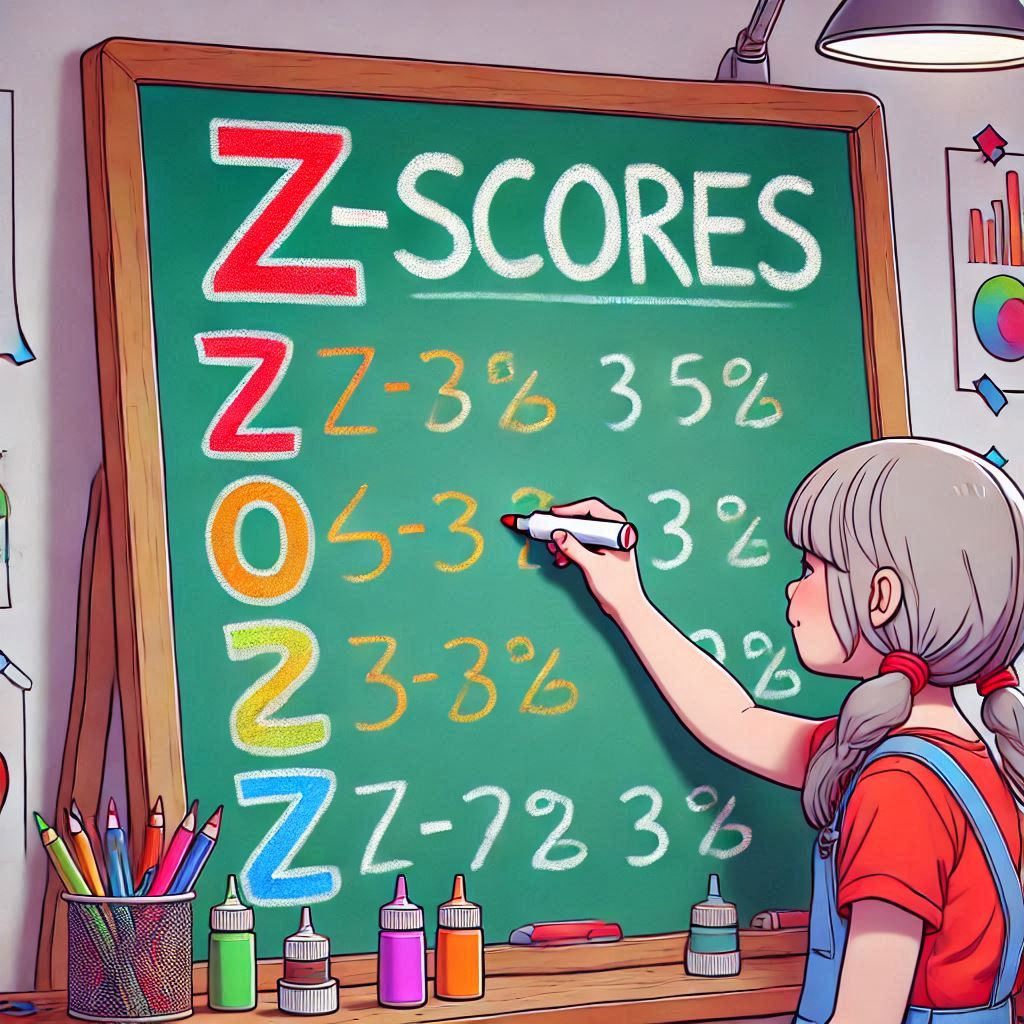

# **z-score c'est quoi ?**

---
Un z-score (ou score standardisé) est une mesure statistique qui indique combien d'écarts-types une valeur donnée se trouve par rapport à la moyenne d'une distribution. Il permet de comparer des valeurs provenant de différentes distributions ou d'analyser où une donnée se situe dans une distribution normale.

# **Formule du z-score :**

---
$$
z = \frac{x - \mu}{\sigma}
$$

- **\(z\)** : le score standardisé (z-score),
- **\(x\)** : la valeur observée,
- **\(μ)** : la moyenne de la distribution,
- **\(σ)** : l'écart-type de la distribution.

# **Interprétation** :


---


*    Si z = 0, la valeur est exactement égale à la moyenne.

*   Si z > 0, la valeur est au-dessus de la moyenne.

*   Si z < 0, la valeur est en dessous de la moyenne.

* La valeur absolue du z-score (∣z∣) indique la distance en termes d’écarts-types par rapport à la moyenne.

# **DANS cet exemple sur une donnée libre d'accès nous allons calculer le Z-score de manière pratique. 😎**

*Cette data est disponible par défaut dans sample data de Google colab, c'est pour cela, je l'ai utiliser.*

In [1]:
# Import des bibliothèques nécessaires
import pandas as pd

In [2]:
# Chargé la donnée dans un dataframe
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

In [3]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
california_housing_dataframe['median_house_value'].describe()

,median_house_value
count,17000.000000
mean,207300.912353
std,115983.764387
min,14999.000000
25%,119400.000000
50%,180400.000000
75%,265000.000000
max,500001.000000


In [5]:
# Fonction pour calculer le z-score
def calculate_z_scores(colonne):
    z_scores = [(x - california_housing_dataframe[colonne].mean()) / california_housing_dataframe[colonne].std() for x in california_housing_dataframe[colonne]]
    name =f'z_score_{colonne}'
    california_housing_dataframe[name] = pd.DataFrame({'z_score': z_scores} )
    california_housing_dataframe
    return california_housing_dataframe

In [6]:
calculate_z_scores('median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score_median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1.210522
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1.096713
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1.048430
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-1.154480
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-1.222593
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,-0.826848
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,-1.106197
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,-0.894099
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,-1.047568



* Les z-scores permettent de détecter les valeurs aberrantes (outliers).
*En général, une valeur est considérée comme aberrante si son z-score est supérieur à 3 ou inférieur à -3

In [7]:
df = calculate_z_scores('median_house_value')

In [8]:
df[df['z_score_median_house_value'] > 3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score_median_house_value


In [9]:
df[df['z_score_median_house_value'] <-3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score_median_house_value


**🥷 Comme vous pouvez le voir, on a aucune maison, dont la valeur s'éloigne des valeurs des maisons de l'ensemble de données.**

----
# **Nous allons maintenant refaire cette même manipulation en utilisant Great Expectations.**


In [ ]:
!pip install great_expectations

In [11]:
# Import des bibliothèques nécessaires
import great_expectations as gx
import great_expectations.expectations as gxe

In [18]:
california_housing_dataframe.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,z_score_median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-1.210522
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-1.096713
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-1.048430


In [17]:
# Retrieve your Data Context
context = gx.get_context()

# Define the Data Source name
data_source_name = "california_housing_data"

# Add the Data Source to the Data Context
data_source = context.data_sources.add_pandas(name=data_source_name)
data_asset_name = "my_dataframe_data_asset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name)
data_asset = context.data_sources.get(data_source_name).get_asset(data_asset_name)
batch_definition_name = "my_batch_definition"
batch_definition = data_asset.add_batch_definition_whole_dataframe(
    batch_definition_name
)
batch_parameters = {"dataframe": california_housing_dataframe}
batch_definition = (
    context.data_sources.get(data_source_name)
    .get_asset(data_asset_name)
    .get_batch_definition(batch_definition_name)
)
# Create an Expectation to test
expectation = gxe.ExpectColumnValueZScoresToBeLessThan(
    column="median_house_value", threshold=3, double_sided=True
)

# Get the dataframe as a Batch
batch = batch_definition.get_batch(batch_parameters=batch_parameters)

# Test the Expectation
validation_results = batch.validate(expectation)
print(validation_results)

Calculating Metrics:   0%|          | 0/13 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "type": "expect_column_value_z_scores_to_be_less_than",
    "kwargs": {
      "batch_id": "california_housing_data-my_dataframe_data_asset",
      "column": "median_house_value",
      "threshold": 3.0,
      "double_sided": true
    },
    "meta": {}
  },
  "result": {
    "element_count": 17000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_counts": [],
    "partial_unexpected_index_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}


**On a le résultat avec succès**


* **🧘 Lorsqu'on travaille sur des pipelines de données, la vérification de la qualité des données est essentielle. Cela inclut des tests statistiques comme les z-scores pour identifier les valeurs aberrantes. Heureusement, avec Great Expectations, il n’est pas nécessaire de coder manuellement le calcul des z-scores.**

* **💪 Great Expectations offre déjà des fonctions intégrées pour ce type d'analyse. Il suffit simplement de connecter vos données, d'appliquer la fonction appropriée, et vous obtenez instantanément le résultat, accompagné de toutes les métadonnées liées à votre opération. Ces métadonnées peuvent inclure les seuils définis, les données hors tolérance, et même des visualisations pour diagnostiquer les anomalies.**

**Avantages :**

* Automatisation simplifiée : Plus besoin d’écrire des fonctions personnalisées pour chaque vérification.

* Rapidité et efficacité : Connectez vos données, configurez vos attentes, et laissez Great Expectations faire le travail.

* Documentation enrichie : Chaque opération est documentée, ce qui facilite le suivi et l’audit des tests.

* Flexibilité : Vous pouvez combiner des tests comme la détection de valeurs aberrantes avec des validations sur des distributions, des schémas ou des types de données.